# Coffee Domestic Consumption

The dataset contains record of countries with the yearly coffee consumption

## Columns
* `Country`: The country where the coffee is being consumed
* `Coffee type`: The type of coffee being consumed
* `1990/91` to `2019/20`: The coffee consumption data for each *fiscal year* from 2019/20 to 2019/20. 
*  `Total_domestic_consumption`: This is the total domestic consumption of the coffee type in the country over the entire period covered by the data.

In [1]:
%%capture
!pip install pycountry_convert

In [45]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# suppress warnings
warnings.filterwarnings('ignore')

# ensure all columns can be viewed at once
pd.set_option('display.max_columns', None)

# Set default color to coffee brown
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#724e2c'])

## Data Loading

In [3]:
df = pd.read_csv('../data/Coffee_domestic_consumption.csv')

In [4]:
# view data
df.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,1800000,1200000,1200000,1200000,1200000,900000,900000,900000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,1980000,2040000,2100000,2190000,2250000,2310000,2700000,2460000,2520000,2610000,2700000,2760000,2850000,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,732000000,762000000,792000000,815400000,825000000,852000000,896760000,932280000,979860000,1026600000,1059600000,1103400000,1147920000,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,114360,93600,81420,86100,83940,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,18000000,13800000,12000000,12000000,9000000,9000000,9000000,9000000,9000000,9000000,9000000,9000000,9000000,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [5]:
# create copy of dataset
df_copy = df.copy()

In [6]:
# examine column names 
df.columns

Index(['Country', 'Coffee type', '1990/91', '1991/92', '1992/93', '1993/94',
       '1994/95', '1995/96', '1996/97', '1997/98', '1998/99', '1999/00',
       '2000/01', '2001/02', '2002/03', '2003/04', '2004/05', '2005/06',
       '2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12',
       '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18',
       '2018/19', '2019/20', 'Total_domestic_consumption'],
      dtype='object')

### Observation:

The column names are inconsistent

### TODO: 

* replace spaces with __
* make all the column names lowercase

In [7]:
# rename columns
df = df.rename(columns={'Country': 'country',
                   'Coffee type': 'coffee_type',
                   'Total_domestic_consumption': 'total_domestic_consumption'})

df.columns

Index(['country', 'coffee_type', '1990/91', '1991/92', '1992/93', '1993/94',
       '1994/95', '1995/96', '1996/97', '1997/98', '1998/99', '1999/00',
       '2000/01', '2001/02', '2002/03', '2003/04', '2004/05', '2005/06',
       '2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12',
       '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18',
       '2018/19', '2019/20', 'total_domestic_consumption'],
      dtype='object')

In [8]:
# examine data types 
pd.DataFrame(df.dtypes).T

,country,coffee_type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,total_domestic_consumption
0,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [9]:
# check for duplicates 
duplicates = df.duplicated().sum()
print(f'There are {duplicates} duplicates in the dataset')

There are 0 duplicates in the dataset


In [10]:
# check for missing values 
pd.DataFrame(df.isna().sum()).T

,country,coffee_type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,total_domestic_consumption
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# check unique countries
print(f'There are {df.country.nunique()} unique countries out of {df.shape[0]} total countries')

There are 55 unique countries out of 55 total countries


In [12]:
# extract year columns as a list
year_columns = df.iloc[:, 2:-1].columns.to_list()

In [13]:
# check countries where rows have same values throughout
same_values = []
for index, row in df[year_columns].iterrows():
    if row.nunique() == 1: 
        same_values.append(index)

same_values

[28, 42]

In [14]:
# View columns with same values all through
df.iloc[[28,42]]

,country,coffee_type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,total_domestic_consumption
28,Equatorial Guinea,Robusta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,Nepal,Arabica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### OBSERVATION: 
Two countries (Equatorial Guinea & ) have zero values all through and will not be useful for the analysis

### TODO:
Drop countries with zero values all through.

In [15]:
df = df.drop(same_values).reset_index(drop=True)
df.shape[0]

53

In [16]:
# examine country column values
pd.DataFrame(df.country).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
country,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,Peru,Rwanda,Timor-Leste,Zimbabwe,Congo,Cuba,Dominican Republic,Haiti,Philippines,Tanzania,Zambia,Cameroon,Central African Republic,Colombia,Costa Rica,Côte d'Ivoire,Democratic Republic of Congo,El Salvador,Ethiopia,Gabon,Ghana,Guatemala,Guinea,Guyana,Honduras,India,Jamaica,Kenya,Lao People's Democratic Republic,Liberia,Mexico,Nicaragua,Nigeria,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen


### OBSERVATION: 

* The country **Bolivia** contains **(Plurinational State of)** which could be problematic in future analysis and feature engineering
* The country **Trinidad & Tobago** should be **Trinidad and Tobago**

### TODO: 
* The country **Bolivia (Plurinational State of)** should be shortened to just **Bolivia**
* Replace "&" in **Trinidad & Tobago** with "and"

In [17]:
# Shorten Bolivia
df.at[1, 'country'] = "Bolivia"
df.at[48, "country"] = "Trinidad and Tobago"

# Verify the updated value
df.at[1, 'country'], df.at[48, 'country']

('Bolivia', 'Trinidad and Tobago')

In [18]:
# examine coffee_type column values
df.coffee_type.value_counts()

Arabica            21
Robusta            14
Robusta/Arabica    10
Arabica/Robusta     8
Name: coffee_type, dtype: int64

### OBSERVATION: 
`Robusta/Arabica` and `Arabica/Robusta` categories can be combined into one category

### TODO:
Replace `Arabica/Robusta` category with `Robusta/Arabica`

In [19]:
# combine robusta/arabica and arabica/robusta coffee types
df['coffee_type'] = df['coffee_type'].replace('Arabica/Robusta', 'Robusta/Arabica')
df.coffee_type.value_counts()

Arabica            21
Robusta/Arabica    18
Robusta            14
Name: coffee_type, dtype: int64

In [20]:
# save cleaned data
df.to_csv('../data/Coffee_domestic_consumption_cleaned.csv', index=False)

----

## Feature Engineering

### TODO:

* Create a continent column

In [21]:
countries = df.country.to_list()

In [22]:
import pycountry_convert as pc

# function to get continent names from country names
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except KeyError:
        return 'Unknown'

# create continent column just after country column
df.insert(1, 'continent', df['country'].apply(country_to_continent))


In [23]:
## check countries continent
df[['country', 'continent',]].head(15)

,country,continent
0,Angola,Africa
1,Bolivia,South America
2,Brazil,South America
3,Burundi,Africa
4,Ecuador,South America
5,Indonesia,Asia
6,Madagascar,Africa
7,Malawi,Africa
8,Papua New Guinea,Oceania
9,Paraguay,South America


In [24]:
# check index with unknown continents
df.continent[df.continent=="Unknown"]

12    Unknown
26    Unknown
Name: continent, dtype: object

In [25]:
# check countries with unknown continents
df.iloc[[12,26]]['country']

12                     Timor-Leste
26    Democratic Republic of Congo
Name: country, dtype: object

In [26]:
# replace "Unknown" continents with the right continents manually
df.at[12, 'continent'] = 'Asia'
df.at[26, 'continent'] = 'Africa'

# verify change to continents
df.at[12, 'continent'], df.at[26, 'continent']

('Asia', 'Africa')

In [27]:
# Save final dataset
df.to_csv('../data/Coffee_domestic_consumption_final.csv', index=False)

---
## EDA


In [28]:
df.describe()

,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,total_domestic_consumption
count,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01
mean,2.208590e+07,2.289973e+07,2.371862e+07,2.388442e+07,2.418132e+07,2.558782e+07,2.661803e+07,2.747665e+07,2.843388e+07,2.914099e+07,3.064320e+07,3.204791e+07,3.254917e+07,3.377284e+07,3.556209e+07,3.752035e+07,3.959272e+07,4.178619e+07,4.347461e+07,4.494274e+07,4.714663e+07,4.889715e+07,5.055001e+07,5.131005e+07,5.261173e+07,5.360287e+07,5.471793e+07,5.624809e+07,5.688074e+07,5.658286e+07,1.154467e+09
std,6.926751e+07,7.153238e+07,7.489431e+07,7.641041e+07,7.812384e+07,8.465947e+07,9.197374e+07,9.604153e+07,1.017084e+08,1.059124e+08,1.100491e+08,1.136596e+08,1.148450e+08,1.185906e+08,1.248037e+08,1.302399e+08,1.372217e+08,1.443224e+08,1.490418e+08,1.549216e+08,1.611686e+08,1.663427e+08,1.716568e+08,1.705143e+08,1.730624e+08,1.748971e+08,1.808185e+08,1.872454e+08,1.891167e+08,1.876903e+08,3.901508e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.940000e+05
25%,2.400000e+05,2.100000e+05,3.600000e+05,3.000000e+05,3.000000e+05,3.960000e+05,2.400000e+05,2.400000e+05,2.920200e+05,2.610000e+05,1.800000e+05,2.400000e+05,2.610000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,4.939800e+05,5.100000e+05,5.160000e+05,5.220000e+05,5.280000e+05,5.340000e+05,5.400000e+05,5.400000e+05,5.400000e+05,5.400000e+05,5.400000e+05,1.008000e+07
50%,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,4.020000e+06,4.140000e+06,4.140000e+06,4.140000e+06,4.140000e+06,4.140000e+06,4.140000e+06,4.140000e+06,4.099980e+06,4.201020e+06,4.303980e+06,4.408980e+06,4.603020e+06,5.523000e+06,5.478000e+06,5.400000e+06,4.680000e+06,4.620000e+06,1.229170e+08
75%,1.320000e+07,1.800000e+07,1.800000e+07,1.860000e+07,1.698000e+07,1.860000e+07,1.800000e+07,1.800000e+07,1.800000e+07,1.800000e+07,1.900002e+07,1.900002e+07,1.900002e+07,1.998000e+07,2.040000e+07,2.040000e+07,2.040000e+07,2.040000e+07,2.010000e+07,1.920000e+07,2.040000e+07,2.100000e+07,2.160000e+07,2.100000e+07,2.280000e+07,2.220000e+07,2.160000e+07,2.190000e+07,2.250000e+07,2.112000e+07,5.908800e+08
max,4.920000e+08,5.100000e+08,5.340000e+08,5.460000e+08,5.580000e+08,6.060000e+08,6.600000e+08,6.900000e+08,7.320000e+08,7.620000e+08,7.920000e+08,8.154000e+08,8.250000e+08,8.520000e+08,8.967600e+08,9.322800e+08,9.798600e+08,1.026600e+09,1.059600e+09,1.103400e+09,1.147920e+09,1.183200e+09,1.219800e+09,1.205100e+09,1.219980e+09,1.230480e+09,1.273500e+09,1.319820e+09,1.332000e+09,1.320000e+09,2.782470e+10


In [29]:
# view continent groups
df['continent'].value_counts()

Africa           23
North America    12
Asia              9
South America     8
Oceania           1
Name: continent, dtype: int64

In [30]:
continent_order = list(df.continent.value_counts().index)

In [31]:
# custom function to remove chart spine/ frame
def remove_spine():
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

# custom function to remove removee xaxis and yaxis labels
def remove_labels(chart):
    chart.set_xlabel('')
    chart.set_ylabel('')


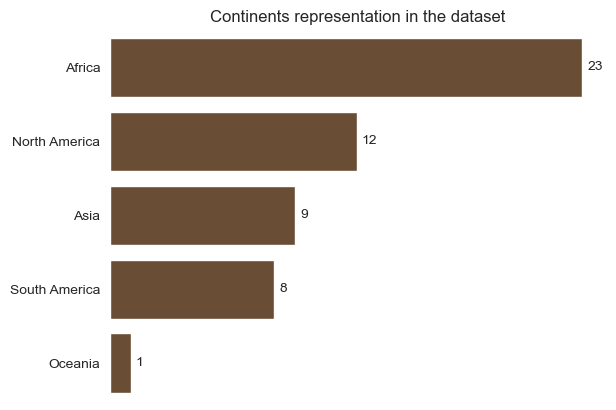

In [44]:
sns.set_style(style='white')

# Plot the countplot
mybars = sns.countplot(data=df,
                       y='continent',
                       order=continent_order,
                       color=sns.color_palette()[0]
                       )  

# Remove the x-axis and y-axis label
mybars.set_ylabel('')

# Remove x-axis label and x-axis ticks
mybars.set_xlabel('')
mybars.set_xticks([])

# Annotate bar with count
for patch in mybars.patches:
    count = patch.get_width()
    x = patch.get_x() + patch.get_width() + 0.25 
    y = patch.get_y() + patch.get_height()/2
    mybars.text(x, y, f'{int(count)}', ha='left', va='center')

# Remove the frame
remove_spine()

# Title
plt.title("Continents representation in the dataset")

# Save image
plt.savefig('../images/continent_group.png', dpi=500, bbox_inches='tight')

plt.show()


In [33]:
# select top 10 countries by with highest domestic consumption
top_10_countries = df.sort_values(by='total_domestic_consumption',
                                  ascending=False).reset_index(drop=True).head(10)
top_10_countries

,country,continent,coffee_type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,total_domestic_consumption
0,Brazil,South America,Robusta/Arabica,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,732000000,762000000,792000000,815400000,825000000,852000000,896760000,932280000,979860000,1026600000,1059600000,1103400000,1147920000,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
1,Indonesia,Asia,Robusta/Arabica,74520000,76800000,79140000,81540000,84000000,86580000,89160000,91920000,94680000,97560000,100560000,120000000,106740000,109980000,120000000,150000000,169980000,199980000,199980000,199980000,199980000,220020000,234000000,255000000,265020000,273000000,279000000,285000000,288000000,288360000,4920480000
2,Ethiopia,Africa,Arabica,72000000,75840000,79860000,84120000,88560000,93300000,98220000,103440000,108960000,114720000,120840000,127260000,134040000,141180000,148680000,156540000,164880000,173640000,182880000,186540000,190260000,194100000,197940000,201900000,205980000,210060000,214260000,218580000,221100000,226860000,4536540000
3,Mexico,North America,Robusta/Arabica,82440000,72000000,78000000,64200000,61200000,70740000,74100000,72060000,66480000,69000000,78300000,90000000,90000000,90000000,90000000,103500000,120000000,132000000,132000000,132000000,141240000,141240000,141240000,139260000,140820000,139740000,141600000,144000000,147000000,145500000,3189660000
4,Philippines,Asia,Robusta/Arabica,43200000,45000000,45000000,46200000,47400000,48600000,49860000,51180000,48600000,51720000,49200000,49260000,49740000,55020000,61200000,62400000,63600000,63600000,103200000,109200000,127500000,130500000,139500000,153000000,168000000,180000000,181800000,190800000,198000000,195000000,2807280000
5,Colombia,South America,Arabica,74100000,76140000,78180000,80340000,82500000,81540000,80580000,79680000,78720000,77820000,76920000,76020000,75120000,74220000,73380000,72540000,71677980,76855380,77430000,76468740,78661440,86103900,90854520,97021200,99927060,103222380,104186484,107596260,107484600,121486440,2536776384
6,Venezuela,South America,Arabica,46943400,48928800,50998200,53155800,55404000,57747600,60190800,62736599,65390400,68156400,71039400,74044200,77176200,80440800,83843400,87390000,91086600,94939800,98955600,99000000,99000000,99000000,99000000,99000000,99000000,99000000,99000000,96000000,93000000,76500000,2386067999
7,India,Asia,Robusta/Arabica,54180000,55000020,55020000,49999980,50100000,50220000,50280000,50340000,54000000,55500000,58500000,64020000,67980000,70020000,72120000,74280000,76500000,81000000,76500000,79500000,79500000,79500000,82500000,84000000,85800000,87000000,86400000,88200000,88500000,87000000,2093460000
8,Viet Nam,Asia,Robusta/Arabica,9000000,13800000,15000000,16020000,16020000,16910700,17850960,18843480,19891140,21000000,24097500,27651900,31130520,36410760,41781360,48000000,55020000,56280000,61260000,72480000,94980000,99000000,109500000,120000000,132000000,138000000,144000000,150000000,156000000,159000000,1920928320
9,Thailand,Asia,Robusta/Arabica,11280000,13200000,13980000,15000000,16980000,25020000,19980000,23400000,25980000,25980000,30000000,30000000,30000000,30000000,30000000,30000000,30000000,33000000,36000000,42000000,46500000,66000000,67800000,72000000,75000000,78000000,81000000,82500000,84000000,84000000,1248600000


In [35]:
def plot_box_for_country(df, country: str):
    # ensure country is in sentencecase
    country = country.title()
    # select only year columns
    country_data = df.query(f"country == '{country}'").iloc[:, 3:-1].T
    if not country_data.empty:
        country_data.columns = [country]
        plt.boxplot(x=f'{country}', data=country_data, labels=[country])
    else: 
        print("Country does not exist")

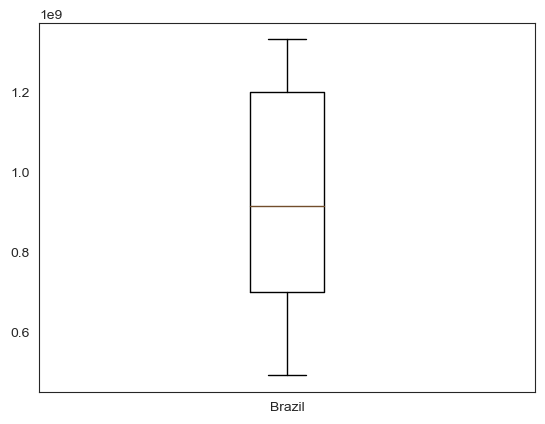

In [43]:
plot_box_for_country(top_10_countries, 'brazil')

In [37]:
countries = top_10_countries.country.to_list()

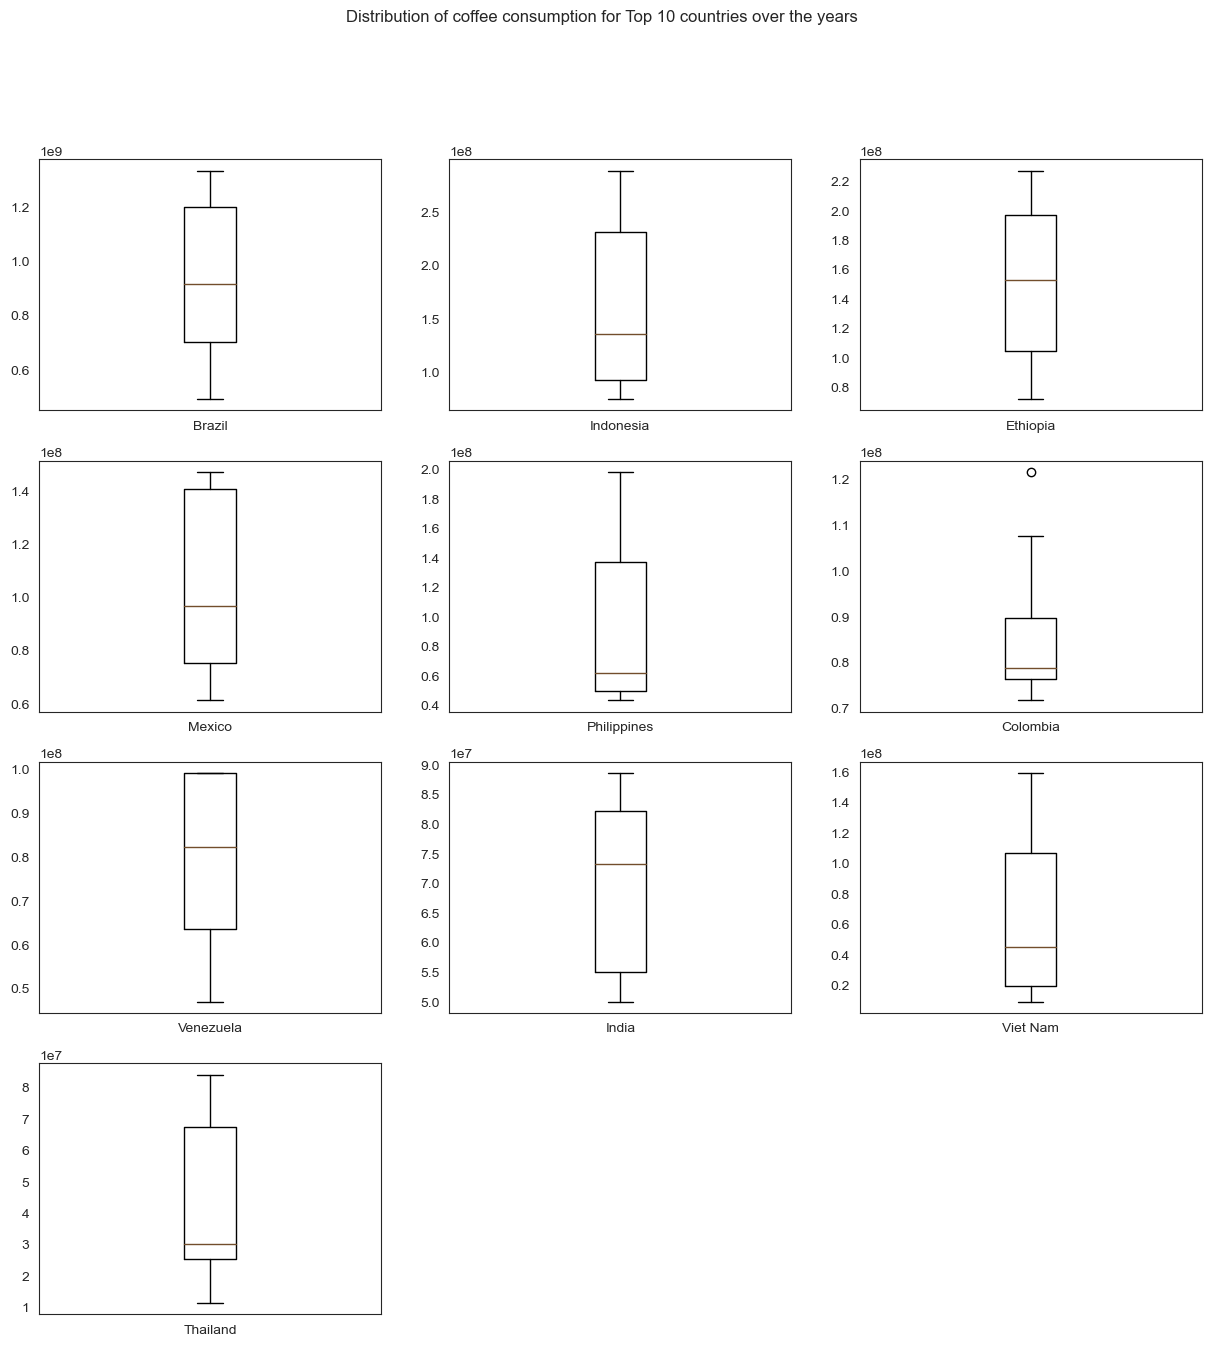

In [42]:
plt.figure( figsize=(15, 15))

# Set the title for the chart
plt.suptitle('Distribution of coffee consumption for Top 10 countries over the years')

for index, country in enumerate(countries):
    ax = plt.subplot(4, 3, index+1)
    plot_box_for_country(top_10_countries, country)


# Save image
plt.savefig('../images/top_10_consumption_distribution.png', dpi=500, bbox_inches='tight')


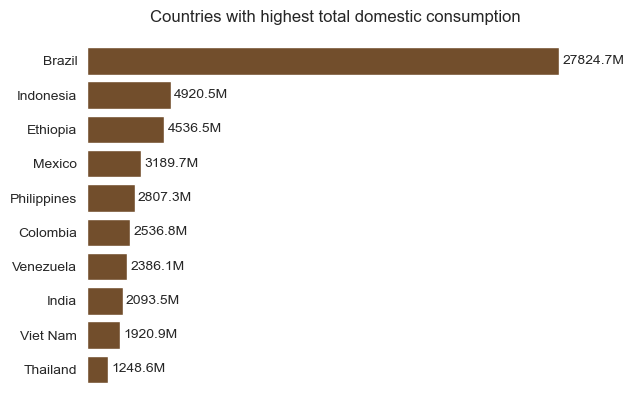

In [41]:
import matplotlib.pyplot as plt

# Sort the dataframe by total_domestic_consumption
top_10_countries_sorted = top_10_countries.sort_values(by='total_domestic_consumption')

# Create the horizontal bar plot
bars = plt.barh(data=top_10_countries_sorted, y='country', width='total_domestic_consumption')

# Remove spine
remove_spine()

# Remove xticks and x-label
plt.xlabel('')
plt.xticks([])


# Annotate the bars with their values in millions
for bar in bars:
    width = bar.get_width() / 1e6
    x = bar.get_x() + bar.get_width() + 200.1e6
    y = bar.get_y() + bar.get_height()/2
    plt.text(x, y, '{:.1f}M'.format(width), ha='left', va='center')

# Title
plt.title("Countries with highest total domestic consumption")

# Save image
plt.savefig('../images/top_domestic_consumption.png', dpi=500, bbox_inches='tight')

plt.show()
